In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 160x160 with 0 Axes>

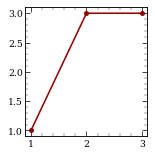

In [4]:
from scipy.optimize import curve_fit
import numpy as np

import sys
top_path = '../'
if top_path not in sys.path:
    sys.path.append(top_path)
    
import matplotlib.pyplot as plt
from plotters.pltStyle import pltStyle
import mplhep as hep
pltStyle('hep')

#### some newer versions of pyplot and mplhep, aren't good friends with jupyter
#### To make the plots be formatted directly well, we need to make a dummy plot and rerun the import
### (a very silly solution)
plt.figure(num=None, figsize=(2, 2), dpi=80)
plt.plot([1,2,3],[1,3,3])
import matplotlib.pyplot as plt
pltStyle('hep') #, font_frac=1.35

Assuming the sigmoid has to approach 1 at x->\infty:
$$\sigma = (1-p_0) + p_0/(1+\exp(-p_1(x-p_2)))$$

In [5]:
def response_fnc(x, *p):
    p0, p1, p2, p3, p4, p5 = p
    logx = x
    return p0+(p1/((logx**2)+p2)) + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def response_fnc2(x, *p):
    p0, p1, p2 = p
    return p0+(p1/((x**2)+p2)) # + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def poly3(x, *p):
    p0, p1, p2, p3 = p
    return p0+p1*x+p2*x**2+p3*x**3 # + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def sigmoid(x, *p):
    p0, p1, p2 = p
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

# def two_gaus_fnc(x, *p):
#     p0, p1, p2, p3, p4, p5, p6, p7, p8 = p
#     return (  p0
#             + (p1/((np.log10(x)**2)+p2))
#             + (p3*np.exp(-p4*((np.log10(x)-p5)*(np.log10(x)-p5))))
#             + (p6*np.exp(-p7*((np.log10(x)-p8)*(np.log10(x)-p8))))
#            )

def test_func(x):
    x = x.copy()
    x[x>10]=10
    x[x<3.5]=3.5
    return 0.935 - 0.0762*x + 0.0129*x**2-4.949e-04*x**3

In [ ]:
# ([0]+([1]/((log10(x)^2)+[2])))+([3]*exp(-([4]*((log10(x)-[5])*(log10(x)-[5]))))

Saving plot with the name =  ../fig/fitting_pion_kaon_fractions/kaon.pdf / .png


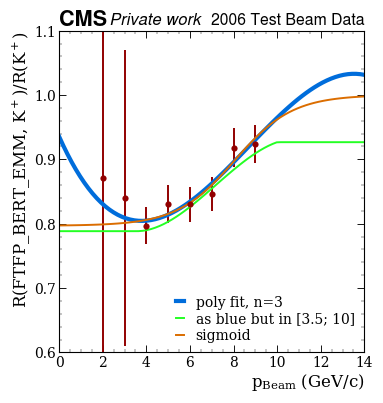

In [508]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import mplhep as hep
yvals = [0.86, 0.84, 0.78, 0.82, 0.82, 0.84, 0.9, 0.9]  #estimated by eye
yerr  = [0.45, 0.25, 0.03, 0.03, 0.025, 0.025, 0.03, 0.03]
yvals = [0.871, 0.840, 0.797, 0.831, 0.830, 0.846, 0.918, 0.924] # actual values
yerr  = [0.484, 0.230, 0.0291, 0.0293, 0.0273, 0.0269, 0.0304, 0.0298]
xvals = np.arange(2,10)
p, cov = curve_fit(poly3, xvals, yvals, sigma=yerr,  p0=[1,1,1,1])
# p2, cov2 = curve_fit(response_fnc2, xvals, yvals, sigma=yerr,  p0=[1,10,10])
p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[0.5,0.5,6])
xvals_c = np.linspace(xvals[0]-2, xvals[-1]+10, 100)
yvals_c = poly3(xvals_c, *p)
# yvals_c2 = response_fnc2(xvals_c, *p2)
yvals_c3 = sigmoid(xvals_c, *p3)
yvals_test = test_func(xvals_c)

fig, ax = plt.subplots()
ax.errorbar(xvals, yvals, yerr, linestyle="none")
ax.plot(xvals_c, yvals_c, markersize=0, linewidth=3, label='poly fit, n=3')
# ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+({:.2g}/(x**2+{:.2g}))'.format(*p2))
ax.plot(xvals_c, yvals_test, markersize=0, label='as blue but in [3.5; 10]')
ax.plot(xvals_c, yvals_c3, markersize=0, label=f'sigmoid') #, p = {np.round(p3,2)}
ax.set_ylim(0.6,1.1)
ax.set_xlim(0,14)
# hep.cms.label("Private work", loc=0, data=False, ax=ax, rlabel='')
ax.set_xlabel("$p_{Beam}$ (GeV/c)")
ax.set_ylabel("R(FTFP_BERT_EMM, $K^+$)/R($K^+$)")

ax.legend(loc='lower right')
hep.cms.label("Private work", loc=0, data=True, ax=ax, rlabel='2006 Test Beam Data')
fig_name = '../fig/fitting_pion_kaon_fractions/kaon'
print("Saving plot with the name = ", fig_name+".pdf / .png")
plt.savefig(fig_name+'.pdf')
plt.savefig(fig_name+'.png')
1;

In [11]:
# %matplotlib notebook

In [12]:
from scipy.stats import norm

def pdf(x, alpha, x_true):
    physics_term = alpha * np.exp(-alpha * x_true)
    detector_term = norm.pdf(x - x_true, loc=7.5, scale=0.5 * np.sqrt(x_true) + 2.5)
    return physics_term * detector_term

In [13]:
def sample_from_pdf(alpha, num_samples):
    samples = []
    for _ in range(num_samples):
        x_true_sample = np.random.exponential(1/alpha)  # Exponential distribution for x_true
        x_sample = np.random.normal(7.5, 0.5 * np.sqrt(x_true_sample) + 2.5)
        
        # Accept or reject the sample based on the PDF
        u = np.random.uniform(0, pdf(x_sample, alpha, x_true_sample))
        if u <= pdf(x_sample, alpha, x_true_sample):
            samples.append(x_sample)
    
    return samples

In [ ]:
import matplotlib.pyplot as plt

alpha = 0.035
num_samples = 10000
samples = sample_from_pdf(alpha, num_samples)

# Plot the histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Sampled PDF')
x_range = np.linspace(0, 20, 1000)
pdf_values = [pdf(x, alpha, 1.0) for x in x_range]
plt.plot(x_range, pdf_values, label='True PDF', color='red')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
from numpy import random
alpha = 0.035
xvals = np.linspace(0,200, 1000)
f = alpha*np.exp(-alpha*xvals)
f2 = np.zeros_like(f)
for xv in xvals:
    f2 += norm.pdf(xvals - xv, loc=7.5, scale=(0.5 * np.sqrt(xv) + 2.5)**2)
# random.poisson(lam=1/alpha)
fig, ax = plt.subplots()
ax.plot(xvals[500:], f[500:], markersize=0, label="fit res")
ax.plot(xvals[500:], f2[500:]/5000, markersize=0, label="2")

<IPython.core.display.Javascript object>


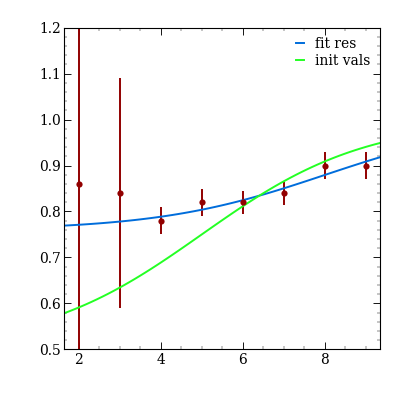

interactive(children=(FloatSlider(value=0.5, description='p0', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

In [180]:
# p, cov = curve_fit(poly3, xvals, yvals, sigma=yerr,  p0=[1,1,1,1])
# p2, cov2 = curve_fit(response_fnc2, xvals, yvals, sigma=yerr,  p0=[1,10,10])
# p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[1,10,10])
# xvals_c = np.linspace(xvals[0]-1, xvals[-1]+5, 100)
# yvals_c = poly3(xvals_c, *p)
# yvals_c2 = response_fnc2(xvals_c, *p2)

fig, ax = plt.subplots()
line = ax.errorbar(xvals, yvals, yerr, linestyle="none")
line_fit, = ax.plot([], [], markersize=0, label="fit res")
line_init, = ax.plot([], [], markersize=0, label="init vals")
ax.set_ylim(0.5, 1.2)
ax.legend()

def fit_sigmoid(p0=0.5,p1=0.5,p2=5):
    p_init = [p0,p1,p2]
    p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=p_init)
    yvals_c3 = sigmoid(xvals_c, *p3)
    yvals_c_init = sigmoid(xvals_c, *p_init)
    
    line_fit.set_data(xvals_c, yvals_c3)
    line_init.set_data(xvals_c, yvals_c_init)
#     ax.relim()
#     ax.autoscale_view()
#     fig.canvas.draw()

#     fig, ax = plt.subplots()
#     ax.errorbar(xvals, yvals, yerr, linestyle="none")
    # ax.plot(xvals_c, yvals_c, markersize=0, linewidth=3, label='{:.2g} + {:.2g}*x + {:.2g}*x**2 + {:.1e}*x**3'.format(*p))
    # ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+({:.2g}/(x**2+{:.2g}))'.format(*p2))
#     ax.plot(xvals_c, yvals_c3, markersize=0, label=f'fit res = {p3}')
#     ax.plot(xvals_c, yvals_c_init, markersize=0, label="init vals")
    # ax.plot(xvals_c, yvals_test, markersize=0, label='as blue but in [3.5; 10]')
#     ax.set_ylim(0.5,1.2)
#     ax.legend()
#     fig.show()

the_interaction = interactive(fit_sigmoid, p0=(-2,2,0.01), p1=(-0.01,2,0.01), p2=(-1,10,0.1) ) 
display(the_interaction)
1;

In [314]:
def poly3(x, *p):
    p0, p1, p2, p3 = p
    return p0+p1*x+p2*x**2+p3*x**3 # + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def poly1(x, *p):
    p0, p1 = p
    return p0+p1*x

def poly2(x, *p):
    p0, p1, p2 = p
    return p0+p1*x+p2*x**2


def test_func(x):
    x = x.copy()
    x[x>10]=10
    x[x<3.5]=3.5
    return 0.926 - 0.0868*x + 0.0162*x**2-7.513e-04*x**3

def sigmoid_ylim(x, *p, ylim):
    p1, p2 = p
    p0 = (1-ylim)*(np.exp(-p1*p2)+1) 
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

def sigmoid_early_flat(x, *p, c):
    p0, p2 = p
    p1=c
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

def sigmoid_early_flat2(x, *p, b):
    p0, p1 = p
    p2=b
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

In [15]:
markus_data = np.array([1.090016, 1.036989, 1.031751, 0.985925, 0.994435, 1.008838, 1.016694, 0.994435, 1.015385, 1.000327])
my_data = np.array([ 1.0915009685683934, 1.0376023245641441, 1.0325148409673186, 0.9865078422795726, 0.9948940823595576, 1.009627882272074, 1.0176082609510715, 0.9961960257451727, 1.0166587514840966, 1.0012813222520776])


In [458]:
def sigmoid(x, *p):
    a, c, b = p
    return (1-a)+a/(1+np.exp(-c*(x-b)))

# def sigmoid(x, *p):
#     p0, p1, p2 = p
#     return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

def grad(x, *p):
    a, c, b = p
#     return np.array([-1+1/(1+np.exp(-c*(x-b))), -(b-x)*a*np.exp(-c*(x-b))/(1+np.exp(-c*(x-b)))**2, -c*a*np.exp(-c*(x-b))/(1+np.exp(-c*(x-b)))**2 ])
    return np.array([-1+1/(1+np.exp(-c*(x-b))), -(b-x)*a*np.exp(-c*(x-b))/(1+np.exp(-c*(x-b)))**2, -c*a*np.exp(-c*(x-b))/(1+np.exp(-c*(x-b)))**2 ])

def error(x, pcov, p):
    cg = np.dot(pcov, grad(x, *p))
    gcg = np.dot(grad(x, *p), cg)
    return np.sqrt(gcg)

# def sigmoid(x, *p):
#     a, c, b = p
#     return (1-a)+a/(1+np.exp(-c*(x-b)))

# def sigmoid(x, *p):
#     p0, p1, p2 = p
#     return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

def grad_ac(x, *p, b=2):
    a, c = p
    return np.array([-1+1/(1+np.exp(-c*(x-b))), -(b-x)*a*np.exp(-c*(x-b))/(1+np.exp(-c*(x-b)))**2])

def error_ac(x, pcov, p, b=2):
    cg = np.dot(pcov, grad_ac(x, *p, b=b))
    gcg = np.dot(grad_ac(x, *p, b=b), cg)
    return np.sqrt(gcg)

In [383]:
# p3
# cov3

In [384]:

# def grad(x):
#     return grad_p(x, *p3)
    
# error(1, cov3)


In [385]:
# xvals_c[0]

In [386]:
# grad(xvals_c[0])

In [387]:
# # grad(xvals_c)
# np.dot(cov3, xvals_c[0])

In [388]:
# cov3
# # grad(x)

In [389]:
# %debug

In [459]:
# yvals_c32

Saving plot with the name =  ../fig/fitting_pion_kaon_fractions/pion.pdf / .png


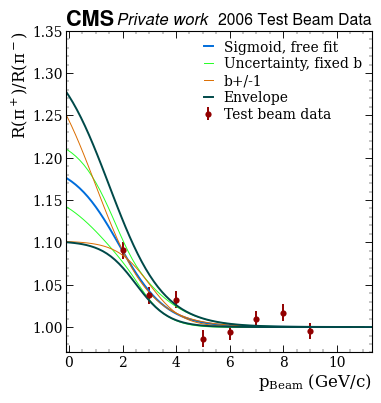

In [506]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# yvals = [1.09, 1.03, 1.05, 1.02, 1]
# yerr = [0.03, 0.03, 0.03, 0.03, 0.03]

# yvals = np.array([1.09434, 1.05263, 1.08014, 1.00813, 0.993789, 1.00464, 1.02804, 1.00601])
# yerr =  np.array([0.045402, 0.0408894, 0.0414722, 0.0365955, 0.0345491, 0.0346888, 0.0356131, 0.033736])
yvals = (markus_data+my_data)/2
yvals = yvals[:-2]
yerr =  np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
# 1/yvals1

# xvals = np.arange(2,7)
xvals = [2,3,4,5,6,7,8,9]
def sigmoid_0p1(x, *p):
    return sigmoid_ylim(x, *p, ylim=1.08)

def sigmoid_c_1p5(x, *p):
    return sigmoid_early_flat(x, *p, c=1.5)
def sigmoid_c_1p2(x, *p):
    return sigmoid_early_flat(x, *p, c=1.2)
def sigmoid_c_1p0(x, *p):
    return sigmoid_early_flat(x, *p, c=1.0)
def sigmoid_c_0p5(x, *p):
    return sigmoid_early_flat(x, *p, c=0.5)
def sigmoid_c_2p0(x, *p):
    return sigmoid_early_flat(x, *p, c=2.0)
def sigmoid_b_2p0(x, *p):
    return sigmoid_early_flat2(x, *p, b=2.0)
def sigmoid_b_3p0(x, *p):
    return sigmoid_early_flat2(x, *p, b=3.0)
def sigmoid_b_1p0(x, *p):
    return sigmoid_early_flat2(x, *p, b=1.0)

p, cov = curve_fit(poly1, xvals, yvals, sigma=yerr,  p0=[1,1])
p2, cov2 = curve_fit(poly2, xvals, yvals, sigma=yerr,  p0=[1,10,10])
p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[0.5,2,6])
p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[0.5,1,6])
def sigmoid_b_optim(x, *p):
    return sigmoid_early_flat2(x, *p, b=p3[2])
p31, cov31 = curve_fit(sigmoid_b_optim, xvals, yvals, sigma=yerr,  p0=[0.1,1])
p4, cov4 = curve_fit(sigmoid_0p1, xvals, yvals, sigma=yerr,  p0=[0.5,6])
p5, cov5 = curve_fit(sigmoid_c_1p2, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p6, cov6 = curve_fit(sigmoid_c_1p5, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p7, cov7 = curve_fit(sigmoid_c_1p0, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p8, cov8 = curve_fit(sigmoid_c_0p5, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p9, cov9 = curve_fit(sigmoid_c_2p0, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p10, cov10 = curve_fit(sigmoid_b_2p0, xvals, yvals, sigma=yerr,  p0=[0.1,1])
p11, cov11 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[0.5,2,2], bounds=([-np.inf, -np.inf, 1.99], [np.inf, np.inf, 2.01]), method='dogbox')
p12, cov12 = curve_fit(sigmoid_b_1p0, xvals, yvals, sigma=yerr,  p0=[0.1,1])
p13, cov13 = curve_fit(sigmoid_b_3p0, xvals, yvals, sigma=yerr,  p0=[0.1,1])

xvals_c = np.linspace(xvals[0]-5.99, xvals[-1]+2, 100)
yvals_c = poly1(xvals_c, *p)
yvals_c2 = poly2(xvals_c, *p2)
yvals_c3 = sigmoid(xvals_c, *p3)
yvals_c31 = sigmoid_b_optim(xvals_c, *p31)
# yvals_c32 = sigmoid(xvals_c, *(p3+cov3.diagonal()))
yvals_c4 = sigmoid_0p1(xvals_c, *p4)
yvals_c5 = sigmoid_c_1p2(xvals_c, *p5)
yvals_c6 = sigmoid_c_1p5(xvals_c, *p6)
yvals_c7 = sigmoid_c_1p0(xvals_c, *p7)
yvals_c8 = sigmoid_c_0p5(xvals_c, *p8)
yvals_c9 = sigmoid_c_2p0(xvals_c, *p9)
yvals_c10 = sigmoid_b_2p0(xvals_c, *p10)
yvals_c11 = sigmoid(xvals_c, *p11)
yvals_c12 = sigmoid_b_1p0(xvals_c, *p12)
yvals_c13 = sigmoid_b_3p0(xvals_c, *p13)
# yvals_test = test_func(xvals_c)

fig, ax = plt.subplots()
ax.errorbar(xvals, yvals, yerr, linestyle="none", label="Test beam data")

# def grad(x):
#     grad_p(x, cov3)

# error_ac/
err = [error_ac(x, cov31, p31, b=p3[2]) for x in xvals_c]

# factor = np.sqrt(cov3[2,2]/4)
# err = [error(x, cov3, p3) for x in xvals_c]
# cov3[2,:] /= factor
# cov3[:,2] /= factor
# # cov3[1,:] /= factor
# # cov3[:,1] /= factor
# # cov3[0,:] /= factor
# # cov3[:,0] /= factor

# err2 = [error(x, cov3, p3) for x in xvals_c]

# err = [error(x, cov3, p3) for x in xvals_c]
# ax.errorbar(xvals2, yvals1, yerr1, linestyle="none")
# ax.plot(xvals_c, yvals_c, markersize=0,  label='{:.2g}+{:.2g}*x'.format(*p))
# ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+{:.2g}*x+{:.1e}*x**2'.format(*p2))
# ax.plot(xvals_c, yvals_c3, markersize=0, label=f'sigmoid')
# ax.plot(xvals_c, yvals_c3+err, markersize=0, linewidth=0.5)
# ax.plot(xvals_c, yvals_c3-err, markersize=0, linewidth=0.5)

col = next(ax._get_lines.prop_cycler)
ax.plot(xvals_c, yvals_c3, markersize=0, label=f'Sigmoid, free fit', **col)

col = next(ax._get_lines.prop_cycler)
ax.plot(xvals_c, yvals_c3+err, markersize=0, linewidth=0.7, label='Uncertainty, fixed b', **col)
ax.plot(xvals_c, yvals_c3-err, markersize=0, linewidth=0.7, **col)
col = next(ax._get_lines.prop_cycler)
ax.plot(xvals_c, yvals_c12, markersize=0, label=f'b+/-1', linewidth=0.7, **col)
ax.plot(xvals_c, yvals_c13, markersize=0, linewidth=0.7, **col)
col = next(ax._get_lines.prop_cycler)
ax.plot(xvals_c+0.5, yvals_c12, markersize=0, label=f'Envelope', **col, linewidth=1.4)
ax.plot(xvals_c-0.5, yvals_c13, markersize=0, **col, linewidth=1.4)
# ax.plot(xvals_c, yvals_c10, markersize=0, label=f'sigmoid, b=2')
# ax.plot(xvals_c, yvals_c10+err, markersize=0, linewidth=0.5)
# ax.plot(xvals_c, yvals_c10-err, markersize=0, linewidth=0.5)

# ax.plot(xvals_c, yvals_c11, markersize=0, label=f'sigmoid, 0<b<4')
# ax.plot(xvals_c, yvals_c11+err, markersize=0, linewidth=0.5)
# ax.plot(xvals_c, yvals_c11-err, markersize=0, linewidth=0.5)

# ax.plot(xvals_c, yvals_c3+err, markersize=0, linewidth=0.5)
# ax.plot(xvals_c, yvals_c3-err, markersize=0, linewidth=0.5)

# ax.plot(xvals_c, yvals_c32, markersize=0, label=f'sigmoid')
# ax.plot(xvals_c, yvals_c4, markersize=0, label=f'sigmoid 1.08 at x=0 , p = {np.round(p4,1)} ')
# ax.plot(xvals_c, yvals_c8, markersize=0, label=f'c=0.5 , p = {np.round(p8,1)} ')
# ax.plot(xvals_c, yvals_c7, markersize=0, label=f'c=1.0 , p = {np.round(p7,1)} ')
# ax.plot(xvals_c, yvals_c5, markersize=0, label=f'c=1.2 , p = {np.round(p5,1)} ')
# ax.plot(xvals_c, yvals_c6, markersize=0, label=f'c=1.5 , p = {np.round(p6,1)} ')
# ax.plot(xvals_c, yvals_c9, markersize=0, label=f'c=2.0 , p = {np.round(p9,1)} ')
# ax.plot(xvals_c, yvals_c8, markersize=0, label=f'sigmoid c=0.5')
# ax.plot(xvals_c, yvals_c7, markersize=0, label=f'sigmoid c=1.0')
# # ax.plot(xvals_c, yvals_c5, markersize=0, label=f'sigmoid c=1.2')
# ax.plot(xvals_c, yvals_c6, markersize=0, label=f'sigmoid c=1.5')
# ax.plot(xvals_c, yvals_c9, markersize=0, label=f'sigmoid c=2.0')

# ax.plot(xvals_c, yvals_test, markersize=0)
ax.set_ylim(0.97,1.35)
ax.set_xlim(-0.1,11.3)
hep.cms.label("Private work", loc=0, data=True, ax=ax, rlabel='2006 Test Beam Data')
# hep.label.exp_text("2006 Test Beam Data", loc=3, ax=ax, rlabel='')

ax.set_xlabel("$p_{Beam}$ (GeV/c)")
ax.set_ylabel(" R($\pi^+$)/R($\pi^-$)")
# ax.set_xscale('log')
ax.legend()
fig_name = '../fig/fitting_pion_kaon_fractions/pion'
print("Saving plot with the name = ", fig_name+".pdf / .png")
plt.savefig(fig_name+'.pdf')
plt.savefig(fig_name+'.png')
1;

In [498]:
p12

array([-0.33458819,  0.98965865])

In [505]:
for xval, yval in zip(xvals, yvals):
#     sigmoid(xval, *[-0.33458819,  0.98965865, 1+0.5])
    yval-(-1/sigmoid(xval, *[-0.33458819,  0.98965865, 1.5])+1)

0.9782845487874448

0.9790790106235154

1.0067971538367093

0.9761605343726902

0.9908300997453695

1.0077938364824126

1.016614273958992

0.9951156925560883

In [415]:
yval_toy = np.random.normal(yvals, yerr)

In [428]:
p3s = np.array([0,0,0])
for ii in range(100):
    yval_toy = np.random.normal(yvals, yerr)
    p3, cov3 = curve_fit(sigmoid, xvals, yval_toy, sigma=yerr,  p0=[0.5,1.1,2])
    p3s = np.vstack([p3s,p3])
p3s = p3s[1:]

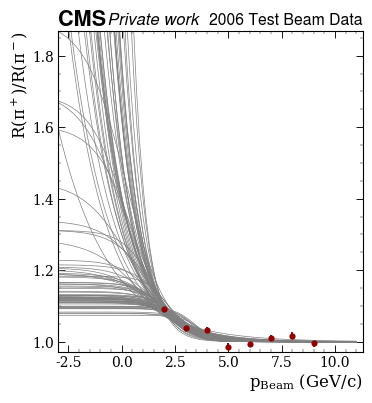

In [438]:
fig, ax = plt.subplots()
ax.errorbar(xvals, yvals, yerr, linestyle="none", label="Test beam data")

for p3 in p3s:
    yvals_toy = sigmoid(xvals_c, *p3)
    ax.plot(xvals_c, yvals_toy, markersize=0, linewidth=0.5, color='grey')
    
ax.set_ylim(0.97,1.87)
ax.set_xlim(-3,11.3)

hep.cms.label("Private work", loc=0, data=True, ax=ax, rlabel='2006 Test Beam Data')
# hep.label.exp_text("2006 Test Beam Data", loc=3, ax=ax, rlabel='')

ax.set_xlabel("$p_{Beam}$ (GeV/c)")
ax.set_ylabel(" R($\pi^+$)/R($\pi^-$)")
# ax.set_xscale('log')
1;

In [397]:
p3

array([-0.19493586,  1.13481243,  1.86678183])

In [400]:
grad(0.1, *p3)

array([-0.88131749,  0.03602415,  0.02313849])

In [408]:
factor = np.sqrt(cov3[2,2]/4)
cov3[2,:] /= factor
cov3[:,2] /= factor
cov3

array([[0.0546632 , 0.12419957, 0.46661834],
       [0.12419957, 0.31122789, 1.07483524],
       [0.46661834, 1.07483524, 4.        ]])

In [374]:
# p11
cov3[2,2]=1

In [352]:
p8
cov8
D = np.diag(np.sqrt(1/np.diag(cov8)))
np.dot(np.dot(D, cov8),D)

array([-566.9313652 ,  -15.79017678])

array([[1.20420710e+12, 4.24846466e+09],
       [4.24846466e+09, 1.49886611e+07]])

array([[1., 1.],
       [1., 1.]])

In [375]:
p3
cov3
D = np.diag(np.sqrt(1/np.diag(cov3)))
np.dot(np.dot(D, cov3),D)

array([-0.19493586,  1.13481243,  1.86678183])

array([[0.26608479, 0.60456785, 1.02949511],
       [0.60456785, 1.51496802, 2.37139761],
       [1.02949511, 2.37139761, 1.        ]])

array([[1.        , 0.95221121, 1.99578734],
       [0.95221121, 1.        , 1.92664919],
       [1.99578734, 1.92664919, 1.        ]])

In [381]:
p3
cov3
D = np.diag(np.sqrt(1/np.diag(cov3)))
np.dot(np.dot(D, cov3),D)

array([-0.19493586,  1.13481243,  1.86678183])

array([[0.26608479, 0.60456785, 0.16277747],
       [0.60456785, 1.51496802, 0.37495088],
       [0.16277747, 0.37495088, 0.1       ]])

array([[1.        , 0.95221121, 0.99789367],
       [0.95221121, 1.        , 0.9633246 ],
       [0.99789367, 0.9633246 , 1.        ]])

In [369]:
p3
cov3
D = np.diag(np.sqrt(1/np.diag(cov3)))
np.dot(np.dot(D, cov3),D)

array([-0.19493586,  1.13481243,  1.86678183])

array([[ 0.26608479,  0.60456785,  2.27136417],
       [ 0.60456785,  1.51496802,  5.23198945],
       [ 2.27136417,  5.23198945, 19.47085197]])

array([[1.        , 0.95221121, 0.99789367],
       [0.95221121, 1.        , 0.9633246 ],
       [0.99789367, 0.9633246 , 1.        ]])

In [310]:
np.sqrt(19.5)

4.415880433163924

In [225]:
p8
cov8

array([-566.9313652 ,  -15.79017678])

array([[1.20420710e+12, 4.24846466e+09],
       [4.24846466e+09, 1.49886611e+07]])

<IPython.core.display.Javascript object>


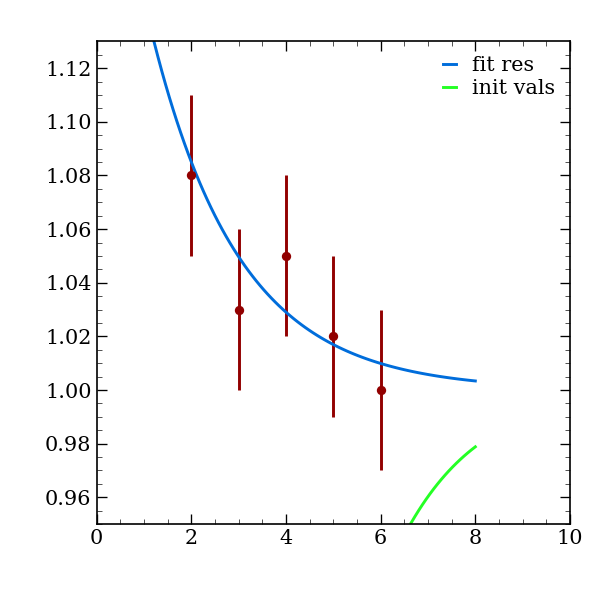

(0.95, 1.13)

interactive(children=(FloatSlider(value=-0.13, description='p0', max=2.0, min=-2.0, step=0.01), FloatSlider(va…

In [195]:
fig, ax = plt.subplots()
line = ax.errorbar(xvals, yvals, yerr, linestyle="none")
line_fit, = ax.plot([], [], markersize=0, label="fit res")
line_init, = ax.plot([], [], markersize=0, label="init vals")
ax.set_ylim(0.95,1.13)
ax.legend()
# ax.set_xscale('log')

def fit_sigmoid(p0=-0.13,p1=0.6,p2=2.2):
    p_init = [p0,p1,p2]
    p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=p_init)
    yvals_c3 = sigmoid(xvals_c, *p3)
    yvals_c_init = sigmoid(xvals_c, *p_init)
    
    line_fit.set_data(xvals_c, yvals_c3)
    line_init.set_data(xvals_c, yvals_c_init)
    ax.set_xlim(0, 10)
#     ax.relim()
#     ax.autoscale_view()
#     fig.canvas.draw()

#     fig, ax = plt.subplots()
#     ax.errorbar(xvals, yvals, yerr, linestyle="none")
    # ax.plot(xvals_c, yvals_c, markersize=0, linewidth=3, label='{:.2g} + {:.2g}*x + {:.2g}*x**2 + {:.1e}*x**3'.format(*p))
    # ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+({:.2g}/(x**2+{:.2g}))'.format(*p2))
#     ax.plot(xvals_c, yvals_c3, markersize=0, label=f'fit res = {p3}')
#     ax.plot(xvals_c, yvals_c_init, markersize=0, label="init vals")
    # ax.plot(xvals_c, yvals_test, markersize=0, label='as blue but in [3.5; 10]')
#     ax.set_ylim(0.5,1.2)
#     ax.legend()
#     fig.show()

the_interaction = interactive(fit_sigmoid, p0=(-2,2,0.01), p1=(-0.01,2,0.01), p2=(-1,10,0.1) ) 
display(the_interaction)